# Sample regressions in Python

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

##### R Square - total variablity of the data/dispersion aka variance 

Similar to variance, we need to use **total sum of squares** (TSS)
TSS gives us a sense of the variability of the data

TSS = SUMation(x-x[mean])^2
SSR = sum of the square residuals

R^2 = 1 - (SSR/TSS)

The higher R^2 the more explanatory power of the model (i.e. an R^2 of less than 10% has little predictive value)

In [2]:
df = pd.read_excel('Housing.xlsx')

In [3]:
df.columns

Index(['House Price', 'House Size (sq.ft.)', 'State', 'Number of Rooms',
       'Year of Construction'],
      dtype='object')

In [4]:
df_price_size = df[['House Price', 'House Size (sq.ft.)']]

In [5]:
x = df_price_size['House Size (sq.ft.)']
y = df_price_size['House Price']

In [6]:
# note: we need to have a constant for the OLS regression

x1 = sm.add_constant(x)
reg = sm.OLS(y, x1).fit() #fit is a method, for dependent variable y

In [7]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Thu, 02 Aug 2018   Prob (F-statistic):           8.13e-06
Time:                        13:19:17   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R^2 is 67.8% which means that size can predict 67.8% of the house price

Note: Greater than 30% typically means that our model has good explanatory power

Constant coef - is our Alpha and our Y intercept, i.e. when we start our line it will start at 260,800

House Size Coef - is our beta, i.e. the slop of the regression line - for every increase in sq.ft we expect our house prices to rise by USD402. However, our std err of USD65.2 tells us that the price rise will typically fall between USD402 by USD65

#### Check 

expected value of y 

y = 260,800 + 402 * 1000 (1000 sqt foot house)

In [8]:
260800 + 402 * 1000

662800

Check the chart to see if a 1000 sqft home should be $662,800

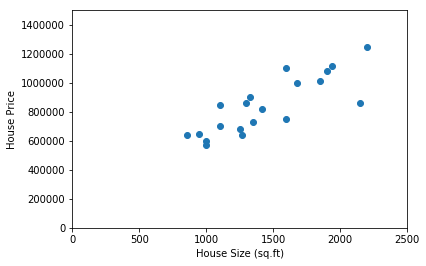

In [9]:
plt.scatter(x,y)
plt.axis([0, 2500, 0, 1500000]) #0,250 is the start and end of x axis
plt.xlabel("House Size (sq.ft)")
plt.ylabel("House Price")
plt.show()

We can see that a 1,000 sqft house will be around 600,000

## Alpha, Beta, R^2

Note: If we don't want to use the chart and tables we can use the linear regression function

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [11]:
slope

401.91628631922595

In [12]:
intercept

260806.2360560964

In [13]:
r_value

0.8235775534696924

In [14]:
r_value ** 2 #R^2

0.678279986579124

In [15]:
p_value

8.129642377231308e-06

In [16]:
std_err

65.24299510636492